## Observations and Insights

## Dependencies and starter code

In [162]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset

combined_data = pd.merge(mouse_metadata,study_results, on="Mouse ID")
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary statistics

In [163]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
combined_data.describe()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000
mean,12.814580,25.662441,19.572108,50.448381,1.021659
std,7.189592,3.921622,14.079460,8.894722,1.137974
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.951474,1.000000
75%,20.000000,29.000000,30.000000,56.292200,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


## Bar plots

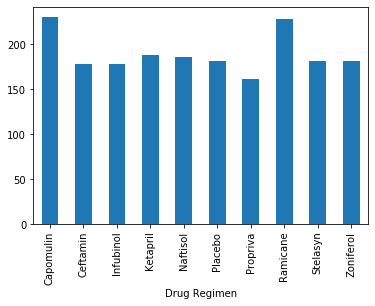

In [177]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
grouped_data = combined_data.groupby("Drug Regimen").size()
type(grouped_data)
grouped_data.plot.bar()
#combined_data.plot.bar()

['Ramicane' 'Capomulin' 'Infubinol' 'Placebo' 'Ceftamin' 'Stelasyn'
 'Zoniferol' 'Ketapril' 'Propriva' 'Naftisol']
[230, 178, 178, 188, 186, 181, 161, 228, 181, 182]


<BarContainer object of 10 artists>

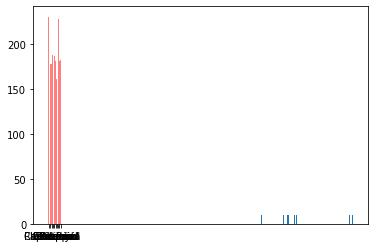

In [191]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
my_names = combined_data["Drug Regimen"].unique()
#print (my_names)
plt.bar(grouped_data, height=10)
mynums = []
for eachelem in grouped_data :
    mynums.append(eachelem)

print (my_names)
print (mynums)
#plt.bar(my_names, mynums)
plt.bar(my_names, mynums, color='r', alpha=0.5, align="center")

## Pie plots

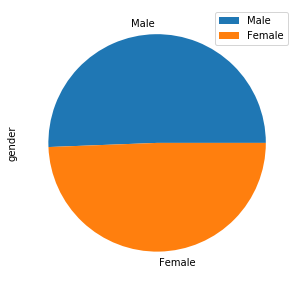

In [165]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice = combined_data["Sex"]
list_mice = []
m_mice = mice.str.count("Male").sum()
f_mice = mice.str.count("Female").sum()
#print(m_mice)
#print(f_mice)
list_mice.append(m_mice)
list_mice.append(f_mice)
labels = ['male' , 'female']
colors = ["red" , "blue"]
explode = (0.1, 0)
df = pd.DataFrame(list_mice)
#df.plot.pie(y=labels)
df = pd.DataFrame({'labels': labels,
                   'gender': list_mice},
                  index=['Male', 'Female'])
plot = df.plot.pie(y='gender', figsize=(5, 5))


plt.pie(list_mice, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

## Quartiles, outliers and boxplots

In [166]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.
my_rows = combined_data.loc[combined_data['Timepoint'] == 45]
sorted_rows = my_rows.sort_values("Tumor Volume (mm3)")
sorted_rows.head(4)

Q1 = sorted_rows["Tumor Volume (mm3)"].quantile(0.25)
Q3 = sorted_rows["Tumor Volume (mm3)"].quantile(0.75)
IQR = Q3 - Q1
print ('25 percentile : ' + str(Q1))
print ('75 percentile : ' + str(Q3))
print( ' IQR          : ' + str(IQR))

my_outliers_low = combined_data.loc[combined_data['Tumor Volume (mm3)'] < Q1 - 1.5*IQR]
my_outliers_high = combined_data.loc[combined_data['Tumor Volume (mm3)'] > Q3 + 1.5*IQR]

if len(my_outliers_high ) == 0:
    print ('no high outliers')
if len(my_outliers_low ) == 0:
    print ('no low outliers')
#print (my_outliers_low)
#print(my_outliers_high)

25 percentile : 40.6583443125
75 percentile : 68.8702959775
 IQR          : 28.211951665000008
no high outliers
no low outliers


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


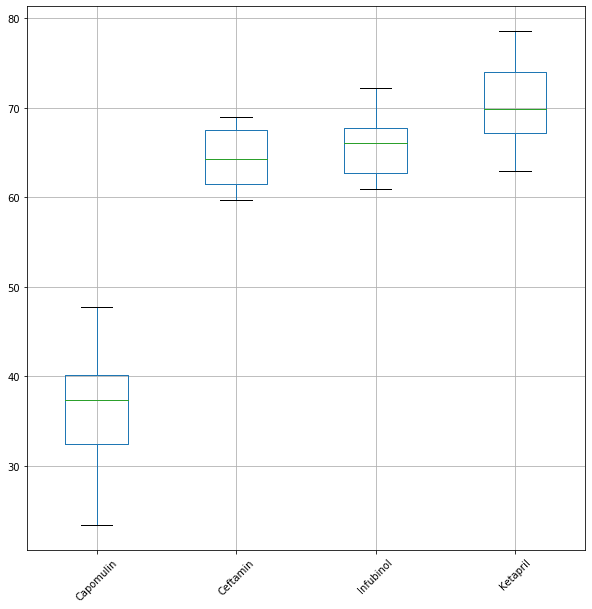

In [244]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#top4 = sorted_rows.head(4)
#top4
#top4_list = top4["Tumor Volume (mm3)"]
#top4.boxplot(column="Tumor Volume (mm3)")
gb = sorted_rows.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list).reset_index()
#print (gb)
first_val =gb.iloc[0]["Tumor Volume (mm3)"]
name1 = gb.iloc[0]["Drug Regimen"]
second_val = gb.iloc[1]["Tumor Volume (mm3)"]
name2 = gb.iloc[1]["Drug Regimen"]
third_val =  gb.iloc[2]["Tumor Volume (mm3)"]
name3 = gb.iloc[2]["Drug Regimen"]
fourth_val = gb.iloc[3]["Tumor Volume (mm3)"]
name4 = gb.iloc[3]["Drug Regimen"]
df = pd.DataFrame([first_val, second_val, third_val, fourth_val])
gb_dict = []

gb.append ([{"C" : first_val} , {"P" :second_val}, {"M" : third_val}, {"F" : fourth_val}])


df = pd.DataFrame([(name1,first_val),
               (name2, second_val),
               (name3,third_val),
               (name4, fourth_val)],
              columns=['Month(s)','Vals']).set_index('Month(s)')


df['Vals'].apply(lambda x: pd.Series(x)).T.boxplot(figsize=(10,10),rot=45)

#df = pd.DataFrame([('      C',first_val),
#               ('   D', second_val),
#               (' E ', third_val),
#               (' F', fourth_val),
#               ],
#              columns=['Drugs','Vals']).set_index('Month(s)')
#df = pd.DataFrame(gb)

#df.boxplot()


## Line and scatter plots

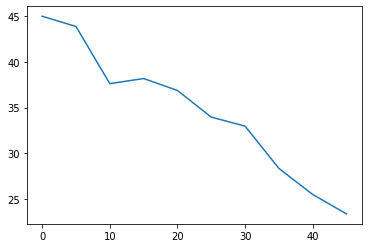

In [168]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
my_rows = combined_data.loc[combined_data['Drug Regimen'] == "Capomulin"]
my_rows_mouse = my_rows.loc[my_rows['Mouse ID'] == "s185"]
#my_rows_mouse 
x_row = my_rows_mouse["Timepoint"]
y_col = my_rows_mouse["Tumor Volume (mm3)"]
#print(type(x_row))
plt.plot(x_row,y_col)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


<class 'list'>


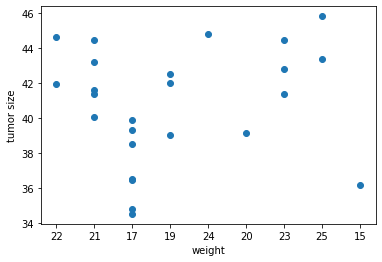

In [169]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
my_avg_rows = my_rows.groupby('Mouse ID')
my_avg_tumour = list(my_avg_rows["Weight (g)"])
my_rows_mouse = my_rows.loc[my_rows['Timepoint'] == "0"]
my_avg_weight = my_avg_rows["Tumor Volume (mm3)"].mean()
#print(my_avg_weight)
my_list = my_avg_weight.reset_index()
my_y_y = pd.DataFrame(my_list)
#print(my_y_y)
my_y   =  list(my_y_y["Tumor Volume (mm3)"])
#plt.plot(my_avg_weight, my_avg_tumour)
#print (my_y)
print(type(my_avg_tumour))
#print (len(my_y))
#a = [1,3,4,5,6]
#b = [10,30,40,50,60]
#plt.scatter(a,b)

#print(my_avg_tumour)
mylist = []
for elems in my_avg_tumour :
    #print (elems)
    my_str = str(elems)
    mylist.append(my_str.split()[2])
    
#print(my_y)
plt.xlabel('weight')
plt.ylabel("tumor size")
plt.scatter(mylist, my_y)
my_dict = {}
for x,y in zip(mylist,my_y) :
    my_dict[x] = y 

#print (mylist.sort())
#my_list_s = mylist.sort()
#print(my_list_s)
#my_y_sorted = []
#for eachelem in my_list_s :
#    my_y_sorted = my_dixt[eachelem]

#plt.xlabel('weight')
#plt.ylabel("tumor size")
#plt.scatter(my_list_s, my_y_sorted)


The correlation between both factors is 0.84


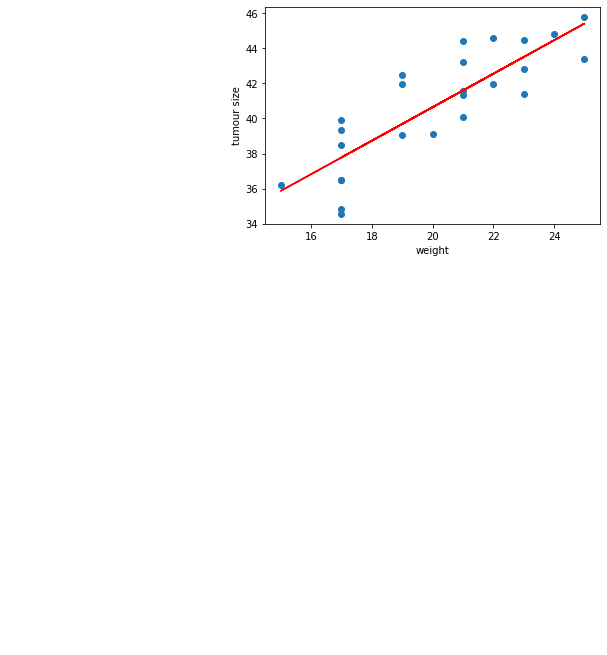

In [173]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
#print(type(mylist[0]))
float_list = []
for eachelem in mylist :
    float_list.append(float(eachelem))
correlation = st.pearsonr(float_list, my_y)

#print (round(correlation[0],2))
print("The correlation between both factors is " + str(round(correlation[0],2)))

x_values = float_list
y_values = my_y
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
slope_f = (float(slope))
intercept_f = (float(intercept))
rvalue_f = (float(rvalue))
pvalue_f = (float(pvalue))
stderr_f = (float(stderr))
regress_values = []
for eachval in x_values :
    regress_values.append(eachval * slope_f + intercept)
    
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('weight')
plt.ylabel('tumour size')
plt.show()